Word level one hot encoding

In [1]:
import numpy as np

In [2]:
samples = ["The cat sat on the mat.","The dog ate my homework."]

In [3]:
token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

In [4]:
max_length = 10

In [5]:
results = np.zeros(shape = (len(samples), max_length, max(token_index.values())+ 1))

In [6]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j ,index] = 1

Character level one hot encoding

In [7]:
import string

In [8]:
samples = ["The cat sat on the mat.","The dog ate my homework."]

In [9]:
characters = string.printable

In [10]:
token_index = dict(zip(range(1, len(characters) + 1), characters))

In [11]:
max_length = 50

In [12]:
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))

In [13]:
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j ,index] = 1

One hot encoding using keras

In [14]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [15]:
samples = ["The cat sat on the mat.","The dog ate my homework."]

In [16]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(samples)

In [17]:
sequences = tokenizer.texts_to_sequences(samples)

In [18]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [19]:
word_index = tokenizer.word_index

In [20]:
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


One hot Hashing Trick

In [21]:
samples = ["The cat sat on the mat.","The dog ate my homework."]

In [22]:
dimensionality = 1000
max_length = 10

In [23]:
results = np.zeros((len(samples), max_length, dimensionality))

In [24]:
for i, sample in enumerate(samples):
    for j, sample in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1

Learning word embeddings with Embedding layer

In [25]:
from keras.layers import Embedding

In [26]:
embedding_layer = Embedding(1000, 64)

In [27]:
from keras.datasets import imdb
from keras import preprocessing

In [28]:
max_features = 1000
maxlen = 20

In [29]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [30]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen= maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen= maxlen)

In [31]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [33]:
model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))
model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.6760 - acc: 0.6019 - val_loss: 0.6382 - val_acc: 0.6788
Epoch 2/10
20000/20000 [==============================] - 1s 55us/step - loss: 0.5741 - acc: 0.7204 - val_loss: 0.5548 - val_acc: 0.7108
Epoch 3/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.5119 - acc: 0.7487 - val_loss: 0.5352 - val_acc: 0.7196
Epoch 4/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.4881 - acc: 0.7609 - val_loss: 0.5291 - val_acc: 0.7242
Epoch 5/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.4760 - acc: 0.7694 - val_loss: 0.5296 - val_acc: 0.7326
Epoch 6/10
20000/20000 [==============================] - 1s 55us/step - loss: 0.4666 - acc: 0.7742 - val_loss: 0.5307 - val_acc: 0.7292
Epoch 7/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.4587 - acc: 0.7805 - val_loss: 0.5329 - val_acc:

Using Pre trained Embeddings

In [35]:
import os

In [87]:
imdb_dir = 'datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Tokenize the Data

In [88]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [89]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [94]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [95]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Download the Glove Vector Embedding

In [96]:
glove_dir = 'datasets/glove6b'
embeddings_index = {}

In [97]:
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))

In [98]:
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

In [99]:
print('Foudn %s word word vectors. '% len(embeddings_index))

Foudn 400000 word word vectors. 


In [100]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [101]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_5 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [103]:
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size=32,
                   validation_data = (x_val, y_val))
model.save_weights('datasets/pre_trained_glove_model.h5')

/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.4677 - acc: 0.4900 - val_loss: 0.6932 - val_acc: 0.5163
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6621 - acc: 0.6600 - val_loss: 0.8677 - val_acc: 0.4967
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5198 - acc: 0.7200 - val_loss: 1.7895 - val_acc: 0.4964
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4825 - acc: 0.8350 - val_loss: 1.5148 - val_acc: 0.5034
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4337 - acc: 0.8350 - val_loss: 1.7646 - val_acc: 0.5046
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2893 - acc: 0.8850 - val_loss: 0.7397 - val_acc: 0.5646
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0721 - acc: 0.9950 - val_loss: 0.7936 - val_acc: 0.5524
Epoch 8/10
200/200 [========

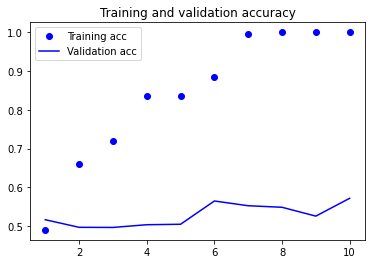

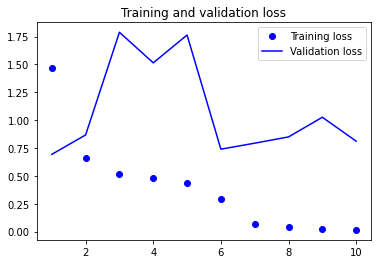

In [106]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [107]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_6 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6921 - acc: 0.5050 - val_loss: 0.6922 - val_acc: 0.5082
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5329 - acc: 0.9650 - val_loss: 0.6989 - val_acc: 0.5075
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3281 - acc: 0.9850 - val_loss: 0.7219 - val_acc: 0.5108
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1573 - acc: 0.9900 - val_loss: 0.7048 - val_acc: 0.5194
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0731 - acc: 1.0000 - val_loss: 0.7326 - val_acc: 0.5157
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0383 - acc: 1.0000 - val_loss: 0.7121 - val_acc: 0.5233
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0209 - acc: 1.0000 - val_loss: 0.7429 - val_acc: 0.5173
Epoch 8/10
200/200 [========

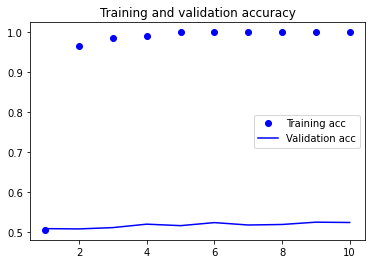

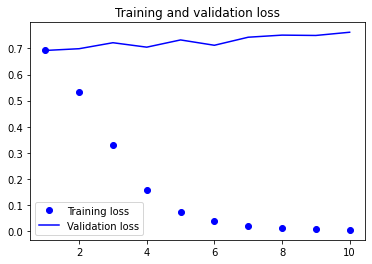

In [109]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [111]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [112]:
model.load_weights('datasets/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 38us/step


[0.8279456302833557, 0.5571600198745728]